<a href="https://colab.research.google.com/github/dphi-official/Deep_Learning_Bootcamp/blob/master/Optimization_Techniques/OptimisingNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author:** [Hasan Ali](https://www.linkedin.com/in/learnmlwithhasan/)

# Optimising a Neural Network ? 

Optimising a Neural Network or any model for that matter is like tuning a radio. The diffirence is there might be a million knobs to tune simulataneously.

In [ ]:
  from IPython.display import Image
Image(url="https://media3.giphy.com/media/l2Je32EwtM8jUnKk8/giphy.gif")

#### Topics in Optimize a neural network:
1. Understanding Overfitting and Underfitting
2. Early Stopping
3. Regularisation
4. Dropout
5. Understanding Local and Global Minima
6. Batch vs Stochastic Gradient Descent
7. Random Initialization/Restart
8. Vanishing Gradient
9. Other Activation Functions

### Understanding Overfitting and Underfitting

`Overfitting` : is a scenario where your model performs well on training data but performs poorly on data not seen during training. This basically means that your model has memorized the training data instead of learning the relationships between features and labels.

If you are familiar with the bias/variance tradeoff, then you can think of overfitting as a situation where your model has high variance, memorizing the random noise in the training set.

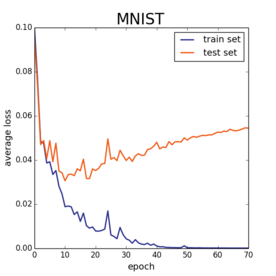

`Underfitting` is the opposite counterpart of overfitting wherein your model exhibits high bias. This situation can occur when your model is not sufficiently complex to capture the relationship between features and labels (or if your model is too strictly regularized).

Underfitting is a bit harder to diagnose. If Accuracy and Validation Accuracy are similar but are both poor, then you may be underfitting. 


### What is tensorboard ? 

Tensorboard is the interface used to visualize the graph and other tools to understand, debug, and optimize the model.It is basically a UI for tensorflow but it can be used for Keras and Pytorch also. (Yes Pytorch which is a deep learning framework by facebook also has support for tensorboard which is a google product...*ain't that collaboration amazing ?* )

### What is Validation Data ?

Generally, the term “validation set” is used interchangeably with the term “test set” and refers to a sample of the dataset held back from training the model.

if you remember train_test-split() in sklearn this train-test is basically train-validation split. We use the validation data to test the trained model on an unseen data(validation data). 

NOTE : We don't use training data to evaluate the model because it would end in biased results since we have already trained on them.



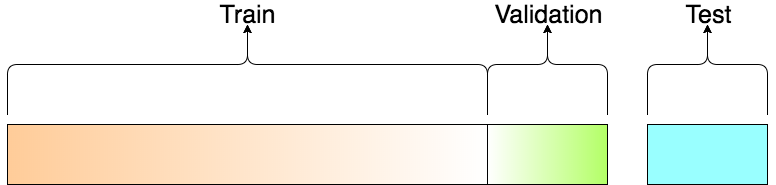

So coming back to overfitting, If you've worked with **tensorboard**, overfitting is easy to diagnose with the accuracy(or loss) visualizations you have available. If "Accuracy" (measured against the training set) is very good and "Validation Accuracy" (measured against a validation set) is not as good, then your model is overfitting. (as seen in image)

### Strategies to avoid overfitting/underfitting


You can combat overfitting by reducing the complexity of your model (i.e. reducing the number of trainable parameters).This is done by :

- Use fewer layers (shallower networks), fewer neurons per layer (narrow networks)
- Using **Dropouts**
- Using **Regularisation**
- **Early Stopping** in some cases

You can combat underfitting by:

- increasing the complexity of your model i.e. increasing layers and number of neurons.With more layers, the network can learn more sophisticated relationships and perhaps perform well on difficult real-world tasks.

Usually we have overfitting rather than underfitting in Neural Networks.

### Using MNSIT Dataset
Here is a simple example of how number of layers and number of neurons affect the model

In [ ]:
# import data science libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
###so that graphs are loaded in the notebook only
%matplotlib inline 

# Import tensorflow
import tensorflow as tf

I hope you don't hate me that above commands downloaded MNIST data set to your local disk space :)
Below you see how to fetch arbitrary number of MNIST image data and their _labels_, a correct digit in each image.

In [ ]:
###loading MNIST dataset which is inside tensorflow libray only
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Label: 5
Digit in the image 0


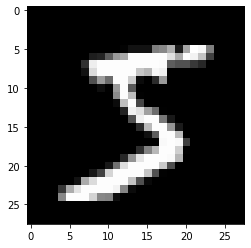

Label: 0
Digit in the image 0


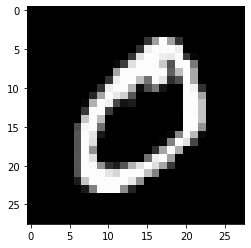

Label: 4
Digit in the image 0


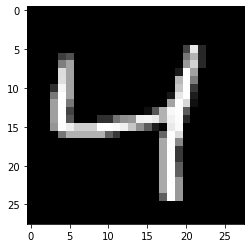

In [ ]:
# Let's see the first 3 images and corresponding labels in our training data
images = X_train[:3]
labels = y_train[:3]

for index, image in enumerate(images):
    print ('Label:', labels[index])
    print ('Digit in the image', np.argmax(labels[index]))  #argmax picks out the label with highest probability
    plt.imshow(image.reshape(28,28),cmap='gray')
    plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
##Tensorboard as we discussed is for visualisation
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
from datetime import datetime

In [ ]:
###why did we reshaped ?? Question for you--?

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [ ]:
###what is to_categorical doing here ? Question for you --?

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

`Neural network with only one input and output layer`

In [ ]:
##Sequential just symbolises 
model1 = Sequential()
##input layer
model1.add(Dense(50, activation='relu', input_shape= (784,) ))

##we will use softmax as activation function because this is a multiclass classification problem.
### if you dont know what softmax , you need to understand it mathematically.
#Intuitively what it does is it converts numbers into probabilities.
###find out more here --> https://www.youtube.com/watch?v=p-XCC0y8eeY
model1.add(Dense(10, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), metrics=['accuracy'])

In [ ]:
## for tensorboard visualisation you can check out the following link: https://youtu.be/Uzkhn5ENJzQ
logdir = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logdir)

In [ ]:
training_history = model1.fit(
    X_train, # input
    y_train, # output
    batch_size=32,
    verbose=1, # Suppress chatty output; use Tensorboard instead
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[tensorboard_callback],
)

Epoch 1/10
   1/1875 [..............................] - ETA: 0s - loss: 180.8055 - accuracy: 0.1250WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1875/1875 [==============================] - 3s 1ms/step - loss: 1.7504 - accuracy: 0.5520 - val_loss: 1.0411 - val_accuracy: 0.6822
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8645 - accuracy: 0.7827 - val_loss: 0.7579 - val_accuracy: 0.8126
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7017 - accuracy: 0.8205 - val_loss: 0.6729 - val_accuracy: 0.8196
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6173 - accuracy: 0.8359 - val_loss: 0.6052 - val_accuracy: 0.8476
Epoch 5/10
1875/1875 [==============================] - 3s

The relative tensorboard graph is below. The maximum accuracy achieved is 0.90. If we train it for longer(for more epochs) maybe the accuracy will increase. 


![underfitting_validation.JPG](https://drive.google.com/uc?export=view&id=1N7odof3bwAVOwbbm73_CdKbH3gWMkp4Z)




#### `Adding many layers to the model`

In [ ]:
model2 = Sequential()
##10 Neurons layer
model2.add(Dense(10, activation='relu', input_shape= (784,) ))

##Many 512 Neuron Layer...try to play with the number of layers (increase or decrease)
model2.add(Dense(512, activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), metrics=['accuracy'])

In [ ]:
logdir = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logdir)

In [ ]:
training_history = model2.fit(
    X_train, # input
    y_train, # output
    batch_size=32,
    verbose=1, # Suppress chatty output; use Tensorboard instead
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[tensorboard_callback],
)

Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.6201 - accuracy: 0.7973 - val_loss: 0.3322 - val_accuracy: 0.8942
Epoch 2/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2884 - accuracy: 0.9096 - val_loss: 0.2715 - val_accuracy: 0.9161
Epoch 3/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2207 - accuracy: 0.9318 - val_loss: 0.2528 - val_accuracy: 0.9220
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1858 - accuracy: 0.9412 - val_loss: 0.2096 - val_accuracy: 0.9359
Epoch 5/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1613 - accuracy: 0.9479 - val_loss: 0.1813 - val_accuracy: 0.9429
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1444 - accuracy: 0.9541 - val_loss: 0.1715 - val_accuracy: 0.9471
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1298 - accuracy: 0.9585 - val_loss: 0.1711 -

![over_fitting](https://drive.google.com/uc?export=view&id=16YqSkIgM-exFGTX6drUMGjyBNjod7q6f)




##### Conclusion

It is clearly visible deep networks have better accuracy and vice versa. Adding more layers increases the accuracy but it might lead to **Overfitting** or **generalisation error**.

### Early Stopping

When training a large network, there will be a point during training when the model will stop generalizing and start learning the statistical noise in the training dataset.

This overfitting of the training dataset will result in an increase in generalization error, making the model less useful at making predictions on new data.

The challenge is to train the network long enough that it is capable of learning the mapping from inputs to outputs, but not training the model so long that it overfits the training data.

How to get through this :
- Either limit the number of Epoch (not preferred)
- Use EarlyStopping criteria (preferred)

EarlyStopping basically stops training at the point when performance on a validation dataset starts to degrade. (It would by default need a validation set to be able to work).

```python
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
```
`monitor` :  you can choose any metric to monitor like val_loss, val_acc. <br>
`mode` :  by default it is auto and knows that you want to minimize loss or maximize accuracy. like *min* in case of val_loss. <br>
`patience`: patience is the number to epochs to wait before stopping it. ex -  If we are chasing *val_loss* and we it is not reducing from the last 50 epoch we stop the training if patience is 50.<br>

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
model3 = Sequential()
model3.add(Dense(128, activation='relu', input_shape= (784,) ))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(10, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])

In [ ]:
logdir = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logdir)

In [ ]:
training_history = model3.fit(
    X_train, # input
    y_train, # output
    batch_size = 32,
    verbose = 1, # Suppress chatty output; use Tensorboard instead
    epochs = 10,
    validation_data = (X_test, y_test),
    callbacks = [tensorboard_callback, es],
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4649 - accuracy: 0.1116 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy:

The training stopped because the *val_loss* was not reducing and it checked this till 5 epochs since we mentioned *patience* = 5